### Mechanical and durability of fiber reinforced concrete incorporating deferent types of natural,pp and steel fiber.

# OBJECTIVE 1

The main aim is to investigate the effect of 3 different types of fiber in oridinary concrete under 
cyclic exposure of heat-cool, Wet-Dry

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
import seaborn as sns

In [108]:
df=pd.read_csv('/Users/draculalemon/Downloads/Final results at 6 months exposure under Heat-Cool Cycles 6.csv',
                index_col='Unnamed: 0')

In [47]:

density = {"M0":[2397.8,2464.0,2454.1],
        "M1":[2430.6,2413.0,2432.4],
        "M2":[2433.0,2429.7,2425.8],
        "M3":[2545.6,2542.6,2506.0],
        "M4":[2456.3,2488.1,2472.6],
        "M5":[2414.6,2406.4,2403.0],
        'M6':[2416.4,2462.5,2476.8],
        'M7':[2410.7,2435.9,2422.1],
        'M8':[2359.4,2411.3,2390.8],
           'M9':[2431.5,2474.1,2383.7],
           'Mix_id':["S1",'S2','S3']}
df_den = pd.DataFrame(density)
df_den.set_index('Mix_id',inplace=True)

In [179]:
flexural = {"M0":[9.003,8.703,8.403],
        "M1":[9.48,9.903,9.75],
        "M2":[9.003,8.25,10.803],
        "M3":[10.203,11.28,13.503],
        "M4":[9.603,8.103,8.403],
        "M5":[9.303,9.003,9.303],
        'M6':[9.003,9.162,8.703],
        'M7':[9.003,8.94,8.703],
        'M8':[8.103,8.859,7.95],
           'M9':[8.559,8.562,7.68],
           'Mix_id':["S1",'S2','S3']}
df_flex = pd.DataFrame(flexural)
df_flex.set_index('Mix_id',inplace=True)

In [112]:
#lets first rename the columns
df.rename(columns={'Unnamed: 2':'steel_fiber,vf=0.2','Unnamed: 3':'steel_fiber,vf=0.6',
                 'Unnamed: 4':'steel_fiber,vf=1','Unnamed: 5':'PalmDataFiber,vf=0.2',
                  'Unnamed: 6':'PalmDataFiber,vf=0.6','Unnamed: 7':'PalmDataFiber,vf=1',
                  'Unnamed: 8':'PPFiber,vf=0.2','Unnamed: 9':'PPFiber,vf=0.6',
                   'Unnamed: 10':'PPFiber,vf=1'},inplace=True)

df_den.rename(columns={'M0':'control','M1':'steel_fiber,vf=0.2','M2':'steel_fiber,vf=0.6',
                 'M3':'steel_fiber,vf=1','M4':'PalmDataFiber,vf=0.2',
                  'M5':'PalmDataFiber,vf=0.6','M6':'PalmDataFiber,vf=1',
                  'M7':'PPFiber,vf=0.2','M8':'PPFiber,vf=0.6',
                   'M9':'PPFiber,vf=1'},inplace=True)

df_flex.rename(columns={'M0':'control','M1':'steel_fiber,vf=0.2','M2':'steel_fiber,vf=0.6',
                 'M3':'steel_fiber,vf=1','M4':'PalmDataFiber,vf=0.2',
                  'M5':'PalmDataFiber,vf=0.6','M6':'PalmDataFiber,vf=1',
                  'M7':'PPFiber,vf=0.2','M8':'PPFiber,vf=0.6',
                   'M9':'PPFiber,vf=1'},inplace=True)

In [115]:
# retrieving rows by loc method 
df_heat_cool=df.loc[['S1','S2','S3']]
df_heat_cool

,Comp.,"steel_fiber,vf=0.2","steel_fiber,vf=0.6","steel_fiber,vf=1","PalmDataFiber,vf=0.2","PalmDataFiber,vf=0.6","PalmDataFiber,vf=1","PPFiber,vf=0.2","PPFiber,vf=0.6","PPFiber,vf=1"
S1,77.27,77.23,68.82,59.38,74.88,63.77,68.21,61.4,73.85,72.9
S2,76.9,74.03,74.87,52.76,61.73,68.2,68,73.2,64.54,73.6
S3,65.85,70.13,78,67.66,74.18,63.83,75.1,69.4,73.1,69.93


In [117]:
df_heat_cool = df_heat_cool.apply(pd.to_numeric)

In [118]:
df_heat_cool.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, S1 to S3
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Comp.                 3 non-null      float64
 1   steel_fiber,vf=0.2    3 non-null      float64
 2   steel_fiber,vf=0.6    3 non-null      float64
 3   steel_fiber,vf=1      3 non-null      float64
 4   PalmDataFiber,vf=0.2  3 non-null      float64
 5   PalmDataFiber,vf=0.6  3 non-null      float64
 6   PalmDataFiber,vf=1    3 non-null      float64
 7   PPFiber,vf=0.2        3 non-null      float64
 8   PPFiber,vf=0.6        3 non-null      float64
 9   PPFiber,vf=1          3 non-null      float64
dtypes: float64(10)
memory usage: 264.0+ bytes


In [56]:
df_flex

,control,"steel_fiber,vf=0.2","steel_fiber,vf=0.6","steel_fiber,vf=1","PalmDataFiber,vf=0.2","PalmDataFiber,vf=0.6","PalmDataFiber,vf=1","PPFiber,vf=0.2","PPFiber,vf=0.6","PPFiber,vf=1"
Mix_id,,,,,,,,,,
S1,9.003,9.480,9.003,10.203,9.603,9.303,9.003,9.003,8.103,8.559
S2,8.703,9.903,8.250,11.280,8.103,9003.000,9.162,8.940,8.859,8.562
S3,8.403,9.750,10.803,13.503,8.403,9.303,8.703,8.703,7.950,7.680


In [53]:
df.head()

,Comp.,"steel_fiber,vf=0.2","steel_fiber,vf=0.6","steel_fiber,vf=1","PalmDataFiber,vf=0.2","PalmDataFiber,vf=0.6","PalmDataFiber,vf=1","PPFiber,vf=0.2","PPFiber,vf=0.6","PPFiber,vf=1"
Mix ID,M0,M1,M2,M3,M4,M5,M6,M7,M8,M9
S1,77.27,77.23,68.82,59.38,74.88,63.77,68.21,61.4,73.85,72.9
S2,76.9,74.03,74.87,52.76,61.73,68.2,68,73.2,64.54,73.6
S3,65.85,70.13,78,67.66,74.18,63.83,75.1,69.4,73.1,69.93


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Mix ID to S3
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Comp.                 4 non-null      object
 1   steel_fiber,vf=0.2    4 non-null      object
 2   steel_fiber,vf=0.6    4 non-null      object
 3   steel_fiber,vf=1      4 non-null      object
 4   PalmDataFiber,vf=0.2  4 non-null      object
 5   PalmDataFiber,vf=0.6  4 non-null      object
 6   PalmDataFiber,vf=1    4 non-null      object
 7   PPFiber,vf=0.2        4 non-null      object
 8   PPFiber,vf=0.6        4 non-null      object
 9   PPFiber,vf=1          4 non-null      object
dtypes: object(10)
memory usage: 512.0+ bytes


In [95]:
df.shape

(4, 10)

Comprensive strength at 6 months Heat-Cool cycle

<Figure size 1800x600 with 0 Axes>

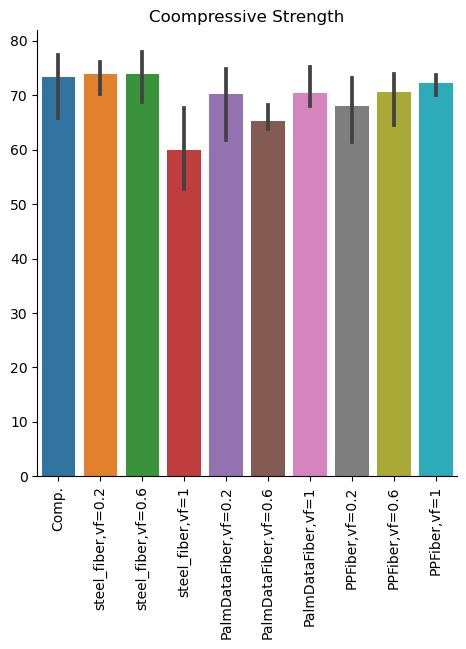

<Figure size 1800x600 with 0 Axes>

In [368]:
#plotting catplot
sns.catplot(data=df_heat_cool,kind='bar')
plt.title('Coompressive Strength')
plt.xticks(rotation ='vertical');plt.figure(figsize=(18, 6))

###### inferance

As in the above graph we have plotted the compressive strenght of different fibers,
based on different vf(Volumne Fraction) such as 0.2,0.6,1
and we can see the most outperform fiber reinforced concrete was M1(steel_fiber,vf=0.2),
and the worst was M3(steel_fiber,vf=1).
and the second higest is M9(PPFiber,vf=1)

# plotting the % increase or decrease from M0 in all Mixes Heat_cool coondition


In [282]:
#as we have to calculate the % increase or decrease from the M0 so we have to write a custom function 
#insted of using pandas pc_change function
Percantage=[]
def percantage_cahnge(orignal_val,new_value):
    pv_change=(orignal_val/new_value)*100
    Percantage.append(pv_change)

In [292]:
percantage_cahnge(77.27,72.9)# storing the valule it into the list anfter calculating

In [302]:
#making the datafram of percanteage change
percant_gain = {"M1":[100.05179334455521],
        "M2":[112.27840743969777],
        "M3":[130.12798922196026],
        "M4":[103.19177350427351],
        "M5":[121.16982907323191],
        "M6":[113.28250989590968],
        'M7':[125.84690553745928],
        'M8':[ 104.63100880162493],
        'M9':[ 105.99451303155006],}
df_percnt = pd.DataFrame(percant_gain)

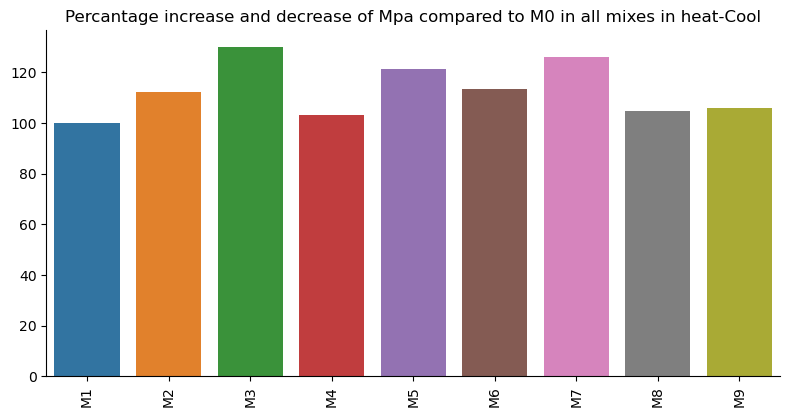

In [387]:
sns.catplot(data=df_percnt,kind="bar",height=4,aspect=2)
plt.title('Percantage increase and decrease of Mpa compared to M0 in all mixes in heat-Cool')
plt.xticks(rotation ='vertical')
plt.show()

inferance:
 
keeping in consideration of heat-cool cycle!  

as we can see that there is high percentage increase in M3(steel_fiber,vf=1) and M7( PPFiber,vf=0.2) in compressive strength at 6 month heat-cool cycle

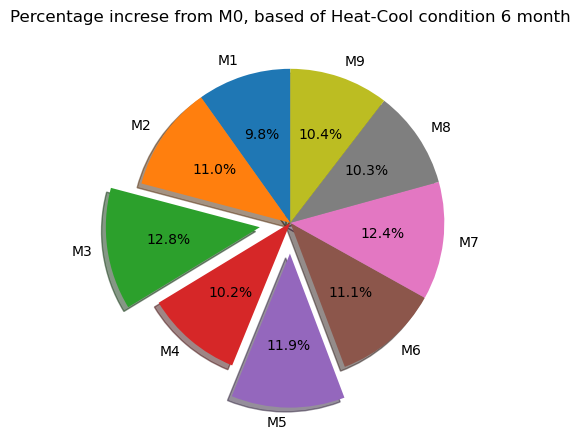

In [518]:
plt.figure(figsize=(12,5))
explode=(0, 0, 0.2, 0,0.2,0,0,0,0) 
plt.pie(Percantage,labels=['M1','M2','M3','M4','M5','M6','M7','M8','M9'],explode=explode,autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Percentage increse from M0, based of Heat-Cool condition 6 month')
plt.show()

###### inferance:
keeping in consideration of Heat-Cool cycle!

we can clearly see that there a rise in percantage increase in all the mixes, and the most increase mixture was M3(steel_fiber,vf=1 ) and the second highest was M5(PalmDataFiber,vf=0.6)

In [499]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, Mix ID to nan
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Comp.                 6 non-null      object
 1   steel_fiber,vf=0.2    6 non-null      object
 2   steel_fiber,vf=0.6    18 non-null     object
 3   steel_fiber,vf=1      17 non-null     object
 4   PalmDataFiber,vf=0.2  18 non-null     object
 5   PalmDataFiber,vf=0.6  6 non-null      object
 6   PalmDataFiber,vf=1    6 non-null      object
 7   PPFiber,vf=0.2        6 non-null      object
 8   PPFiber,vf=0.6        6 non-null      object
 9   PPFiber,vf=1          6 non-null      object
dtypes: object(10)
memory usage: 2.9+ KB


# Plotting the density of the concrete

The density of concrete varies, but generall is around 2,450 kilograms per cubic metre 
so this number will be our treshold limit. any value below this will not be considered.

High density concrete is also known as Heavy weight concrete. High density concrete is mainly used for the purpose of radiation shielding, for counterweights and other uses where high density is required.

<Figure size 1800x600 with 0 Axes>

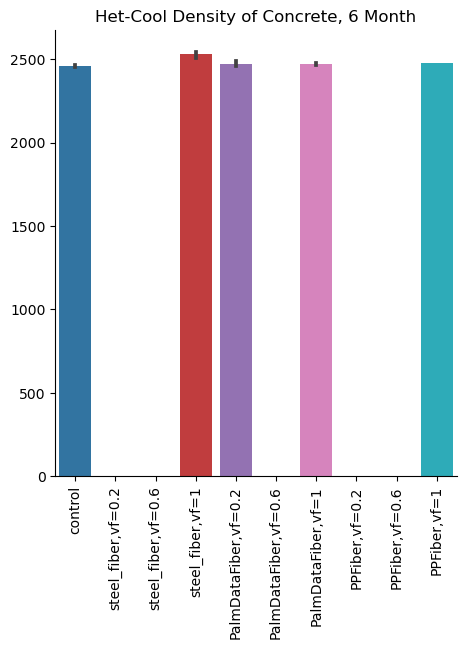

<Figure size 1800x600 with 0 Axes>

In [500]:
#plotting the density plot
#defyning a threshold limit of 2450kg as a density limit
df_new = df_den[df_den >2450]
sns.catplot(data=df_new,kind='bar')
plt.title('Het-Cool Density of Concrete, 6 Month')
plt.xticks(rotation ='vertical');plt.figure(figsize=(18, 6))

keeping in consideration of heat-cool cycle!

we can see that there is not much difference in the density of the normal concrete Vs concret
having different types of fiber reinforced in it.

# plotting the Flexural heat-cool

Flexural testing measures the force required to bend a beam of concrete material and determines the resistance to flexing or stiffness of a material. Flex modulus is indicative of how much the material can flex before permanent deformatio

<Figure size 1800x600 with 0 Axes>

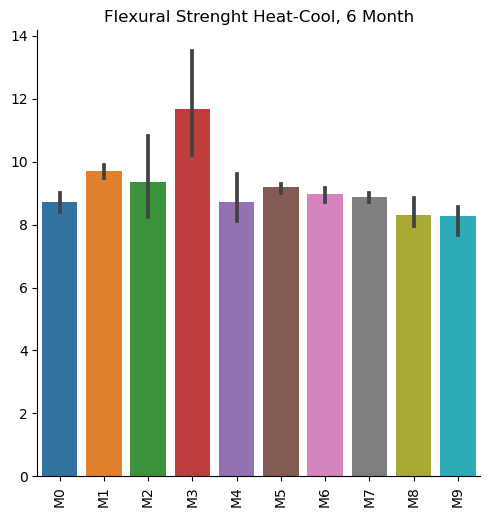

<Figure size 1800x600 with 0 Axes>

In [494]:
sns.catplot(data=df_flex,kind='bar')
plt.title('Flexural Strenght Heat-Cool, 6 Month')
plt.xticks(rotation ='vertical');plt.figure(figsize=(18, 6))

inferance:

keeping in consideration of heat-cool cycle

we can see in the flexural test, the normal concret not perfrom so good as compared with the rest of the fiber mixture, the most outperfrom was M3(steel_fiber,vf=1), as it is clear that 
(vf=1 and fiber= Steel) has the more flexural properties than the rest.

Lesser the standard deviation the better the concrete mixure is.

THE HYPOTHEIS IS 

keeping in consideration of heat-cool cycle!

Those mixture with steel reinsforced and a vf of 1% is the optimum choice over normal concrete.
 
The hypothesis is based on only one consideration ( Compressive Strength ) of the concrete

As in the data we have seen that the mixure having the lowest SD in compressive strenght is M9(PPFiber,vf=1) and the second lowest was M5(PalmDataFiber,vf=0.6) and third lowest was M1(steel_fiber,vf=0.2) this means that the lower the SD the better the quality of the mixture


hypothesis result : we have to reject the hypothesis that the mixture having steel reinfroced and vf=1%, is the optimum choice based on compressive strenght point, because the SD is varrying much more than the mixture having M5,M9,M1 respectively.


# OBJECTIVE 2

The main aim is to investigate the effect of 3 different types of fiber in oridinary concrete under 
cyclic exposure of WET-DRY.

In [332]:
#making the datafram for analysis
df_wet_dry = {"M0":[62,58.9,np.nan],
        "M1":[58.21,68.1,63.92],
        "M2":[74,74.6,np.nan],
        "M3":[67.4,69.5,71.82],
        "M4":[77,68.24,69.4],
        "M5":[64.4,72.63,63.9],
        'M6':[77.41,78.91,70.52],
        'M7':[71.14,67.36,67.05],
        'M8':[67.2,71.6,64.5],
           'M9':[76.51,70.14,67.61],
           'Mix_id':["S1",'S2','S3']}
df_wetdry = pd.DataFrame(df_wet_dry)
df_wetdry .set_index('Mix_id',inplace=True)

In [334]:
densitywetdry = {"M0":[2490.0,2504.0,2502.1],
        "M1":[2497.6,2518.7,2470.8],
        "M2":[2476.0,2480.7,2496.6],
        "M3":[2600.6,2583.3,2621.0],
        "M4":[2531.8,2602.1,2514.9],
        "M5":[2524.1,2450.1,2488.3],
        'M6':[2503.3,2538.3,2466.3],
        'M7':[2495.0,2515.7,2520.3],
        'M8':[2494.7,2521.3,2474.3],
           'M9':[2568.8,2558.3,2508.4],
           'Mix_id':["S1",'S2','S3']}
df_den_wetdry = pd.DataFrame(densitywetdry)
df_den_wetdry .set_index('Mix_id',inplace=True)

In [335]:
flexural_wetdry = {"M0":[6.603,7.503,8.403],
        "M1":[8.67,9.303,8.703],
        "M2":[9.003,np.nan,9.603],
        "M3":[12.303,12.603,11.703],
        "M4":[7.503,8.703,7.503],
        "M5":[9.18,10.203,8.703],
        'M6':[7.203,6.603,7.503],
        'M7':[10.146,9.48,9.603],
        'M8':[9.183,8.403,9.303],
           'M9':[8.703,9.303,8.703],
           'Mix_id':["S1",'S2','S3']}
df_flex_wetDry = pd.DataFrame(flexural_wetdry)
df_flex_wetDry .set_index('Mix_id',inplace=True)

In [333]:
df_wetdry # as we have nan value in the data so we have to inpute in with median

,M0,M1,M2,M3,M4,M5,M6,M7,M8,M9
Mix_id,,,,,,,,,,
S1,62.0,58.21,74.0,67.40,77.00,64.40,77.41,71.14,67.2,76.51
S2,58.9,68.10,74.6,69.50,68.24,72.63,78.91,67.36,71.6,70.14
S3,NaN,63.92,NaN,71.82,69.40,63.90,70.52,67.05,64.5,67.61


In [336]:
df_den_wetdry

,M0,M1,M2,M3,M4,M5,M6,M7,M8,M9
Mix_id,,,,,,,,,,
S1,2490.0,2497.6,2476.0,2600.6,2531.8,2524.1,2503.3,2495.0,2494.7,2568.8
S2,2504.0,2518.7,2480.7,2583.3,2602.1,2450.1,2538.3,2515.7,2521.3,2558.3
S3,2502.1,2470.8,2496.6,2621.0,2514.9,2488.3,2466.3,2520.3,2474.3,2508.4


In [337]:
df_flex_wetDry # as we have nan value in the data so we have to inpute in with median

,M0,M1,M2,M3,M4,M5,M6,M7,M8,M9
Mix_id,,,,,,,,,,
S1,6.603,8.670,9.003,12.303,7.503,9.180,7.203,10.146,9.183,8.703
S2,7.503,9.303,NaN,12.603,8.703,10.203,6.603,9.480,8.403,9.303
S3,8.403,8.703,9.603,11.703,7.503,8.703,7.503,9.603,9.303,8.703


<Figure size 1800x600 with 0 Axes>

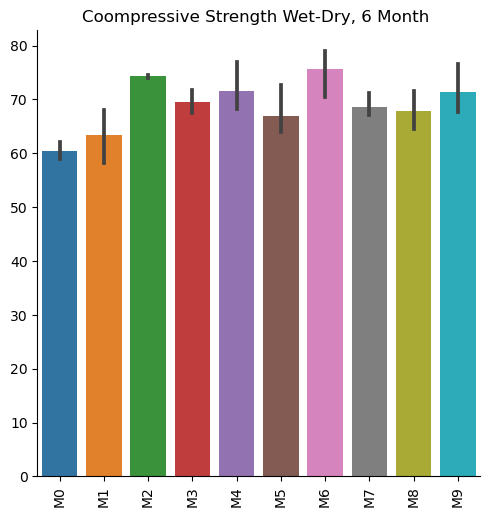

<Figure size 1800x600 with 0 Axes>

In [496]:
sns.catplot(data=df_wetdry,kind='bar')
plt.title('Coompressive Strength Wet-Dry, 6 Month ')
plt.xticks(rotation ='vertical');plt.figure(figsize=(18, 6))

###### Inferance:

keeping in consideration of wet-dry cycle!
 
As in the above graph we have plotted the compressive strenght of different fibers, based on different vf(Volumne Fraction) such as 0.2,0.6,1 and we can see the most outperform fiber reinforced concrete in wet-dry condition is  M6(PalmDataFiber,vf=1), as compared with the normal concrete mixture in the wet-dry condition and the worst was M0( Oridinary Concrete). and the second higest is M2(steel_fiber,vf=0.6)


###### NOTES:
Moisture Affects Concrete Strength and reduce the concrete's compressive strength and durability. As concrete's surface area increases, particularly with the addition of fine aggregates. The increased water leads to a higher water-to-cement ratio, thus making the mixture weak from inside.

In [373]:
#as we have seen there are some missing values in the data set so we will fill it with mean value

mean_value1=df_wetdry['M0'].mean()
mean_value2=df_wetdry['M2'].mean() 
# Replace NaNs in column with the
# mean of values in the same column
df_wetdry['M0'].fillna(value=mean_value1, inplace=True)
df_wetdry['M2'].fillna(value=mean_value2, inplace=True)

In [374]:
df_wetdry

,M0,M1,M2,M3,M4,M5,M6,M7,M8,M9
Mix_id,,,,,,,,,,
S1,62.00,58.21,74.0,67.40,77.00,64.40,77.41,71.14,67.2,76.51
S2,58.90,68.10,74.6,69.50,68.24,72.63,78.91,67.36,71.6,70.14
S3,60.45,63.92,74.3,71.82,69.40,63.90,70.52,67.05,64.5,67.61


In [375]:
#as we have to calculate the % increase or decrease from the M0 so we have to write a custom function 
#insted of using pandas pc_change function
Percantage1=[]
def percantage_cahnge(orignal_val,new_value):
    pv_change=(orignal_val/new_value)*100
    Percantage1.append(pv_change)

In [385]:
percantage_cahnge(62,76.51)

In [388]:
#making the datafram of percanteage change
percant_gain_wetdry = {"M1":[106.51090877856038],
        "M2":[83.78378378378379],
        "M3":[91.98813056379821],
        "M4":[80.51948051948052],
        "M5":[96.27329192546583],
        "M6":[80.09301123885804],
        'M7':[87.15209446162497],
        'M8':[92.26190476190476],
        'M9':[81.03515880277088],}
df_percntWetDry = pd.DataFrame(percant_gain_wetdry)

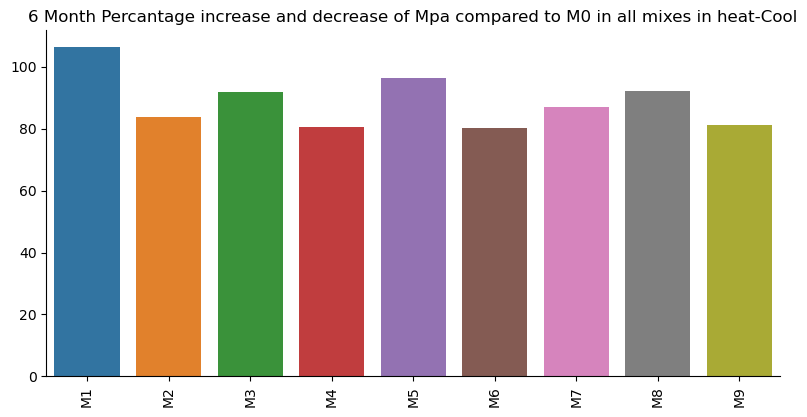

In [497]:

sns.catplot(data=df_percntWetDry,kind="bar",height=4,aspect=2)
plt.title('6 Month Percantage increase and decrease of Mpa compared to M0 in all mixes in heat-Cool')
plt.xticks(rotation ='vertical')
plt.show()

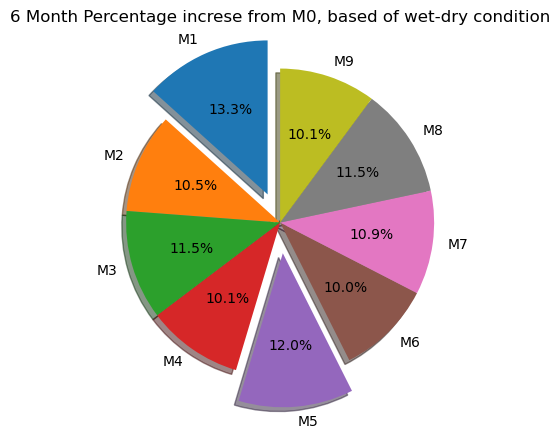

In [498]:

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
# only "explode" the 2nd slice (i.e. 'Hogs')
plt.figure(figsize=(12,5))
explode=(0.2, 0, 0, 0,0.2,0,0,0,0) 
plt.pie(Percantage1,labels=['M1','M2','M3','M4','M5','M6','M7','M8','M9'],explode=explode,autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title('6 Month Percentage increse from M0, based of wet-dry condition')
plt.show()

###### inferance:
keeping in consideration of wet-dry cycle!
 we can clearly see that there a rise in percantage increase in all the mixes, and the most increase mixture was M1(steel_fiber,vf=0.2 ) and the second highest was M5(PalmDataFiber,vf=0.6), which is total different in the case of other concrete mix with condition having heat-cool for 6 month.

# Conclusion Of compressive strenght of 6 month cycle (Heat-cool Vs Dry-Wet)

As with the data and graph we have plotted we can conclude that different mixture perform different in different conditions like M3(steel_fiber,vf=1 ) and M5(PalmDataFiber,vf=0.6)
performed best in Het-Cool condition of 6 month period, and conversely in Wet-Dry condition
M1(steel_fiber,vf=0.2 ) and M5(PalmDataFiber,vf=0.6) performed well.


Hence, M5(PalmDataFiber,vf=0.6) was the optimum concrete mixture which performed optimumly well in both Heat-Cool and Wet-Dry condition


<Figure size 1800x600 with 0 Axes>

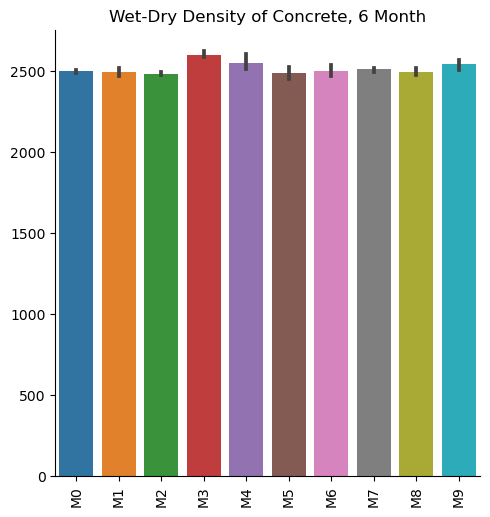

<Figure size 1800x600 with 0 Axes>

In [504]:
df_new1 = df_den_wetdry[df_den_wetdry >2450]
sns.catplot(data=df_new1,kind='bar')
plt.title('Wet-Dry Density of Concrete, 6 Month')
plt.xticks(rotation ='vertical');plt.figure(figsize=(18, 6))

###### inferance:

keeping in consideration of Wet-Dry cycle!

as we can see from the above graph that M3(steel_fiber,vf=1) performed little good than rest of the mixture mostly if we compare it with the Control concrete mixture M0

# Conclusion Of Density of 6 month cycle (Heat-cool Vs Dry-Wet)

As with the density data and graph we have plotted we can conclude that different mixture performed different in different conditions but most of the mixture are very much similar to 
the same condition and those are like M3(steel_fiber,vf=1 ) and M5(PalmDataFiber,vf=0.6) performed best in Wet-Dry condition of 6 month period, and conversely in Heat-Cool condition M1(steel_fiber,vf=0.2 ) and M4(PalmDataFiber,vf=0.6) performed well.

<Figure size 1800x600 with 0 Axes>

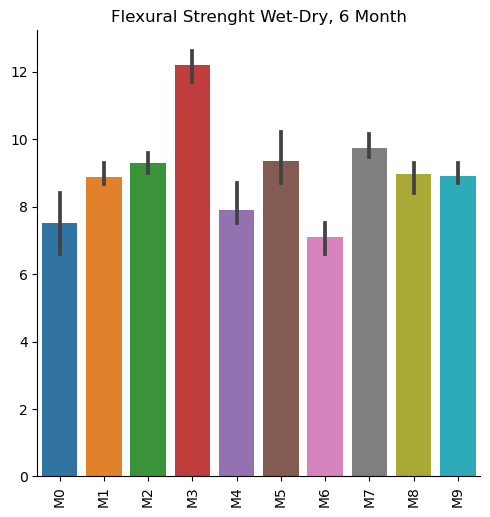

<Figure size 1800x600 with 0 Axes>

In [507]:
sns.catplot(data=df_flex_wetDry,kind='bar')
plt.title('Flexural Strenght Wet-Dry, 6 Month')
plt.xticks(rotation ='vertical');plt.figure(figsize=(18, 6))

###### inferance:
like in earlier test, M3(steel_fiber,vf=1) performs the best, and the worst is the M6(PalmDataFiber,vf=1). and normal concrete or normal mixture the worst.

# Conclusion Of Flexural of 6 month cycle (Heat-cool Vs Dry-Wet)

As with the density data and graph we have plotted we can conclude that different mixture are having different flexural based on conditions, but when its come to coparing it with normal concrete its didnt perform so well in all these above mixture.the best one are the M3(steel_fiber,vf=1 ) is both the condition on Wet-dry of 6 month periods.

# FINAL RESULT AT 28 DAYS " water curing "

Curing is designed primarily to keep the concrete moist by preventing loss of moisture from it during the period in which it is gaining strength. Curing can be achieved by keeping the concrete element completely saturated or as much saturated as possible until the water-filled spaces are substantially reduced by hydration products

In [533]:
water_curing = {"M0":[64.641,64.04,64.89],
        "M1":[58.39,67.19,66.83],
        "M2":[62.53,62.34,66.4],
        "M3":[60.1,65.3,64.3],
        "M4":[59.1,57.2,58.1],
        "M5":[54.5,55.4,55.1],
        'M6':[70.8,72.34,64.38],
        'M7':[71.03,71.63,67.55],
        'M8':[64.27,np.nan,68.86],
           'M9':[54.6,56.6,np.nan],
           'Mix_id':["S1",'S2','S3']}
df_waterCurng = pd.Dame(water_curing)
df_waterCurng.set_index('Mix_id',inplace=True)

In [534]:
df_waterCurng

,M0,M1,M2,M3,M4,M5,M6,M7,M8,M9
Mix_id,,,,,,,,,,
S1,64.641,58.39,62.53,60.1,59.1,54.5,70.80,71.03,64.27,54.6
S2,64.040,67.19,62.34,65.3,57.2,55.4,72.34,71.63,NaN,56.6
S3,64.890,66.83,66.40,64.3,58.1,55.1,64.38,67.55,68.86,NaN


In [535]:
#SD which is already provided
SD=[0.4368,4.9800,2.2911,2.7592,0.9504,0.4582,4.2219,2.2029,3.2456,1.4142]

In [538]:
water_curing_den = {"M0":[2512.4,2509.2,2520.5],
        "M1":[2543.2,2498.5,2516.3],
        "M2":[2501.4,2556.9,2526.9],
        "M3":[2589.9,2586.0,2589.4],
        "M4":[2537.4,2535.6,2530.4],
        "M5":[2508.1,2518.0,2514.5],
        'M6':[2493.3,2507.3,2488.4],
        'M7':[2485.5,2550.7,2450.6],
        'M8':[2496.6,2471.6,2461.5],
           'M9':[2555.7,2420.1,2502.4],
           'Mix_id':["S1",'S2','S3']}
df_waterCurng_density = pd.DataFrame(water_curing_den)
df_waterCurng_density.set_index('Mix_id',inplace=True)

In [539]:
df_waterCurng_density

,M0,M1,M2,M3,M4,M5,M6,M7,M8,M9
Mix_id,,,,,,,,,,
S1,2512.4,2543.2,2501.4,2589.9,2537.4,2508.1,2493.3,2485.5,2496.6,2555.7
S2,2509.2,2498.5,2556.9,2586.0,2535.6,2518.0,2507.3,2550.7,2471.6,2420.1
S3,2520.5,2516.3,2526.9,2589.4,2530.4,2514.5,2488.4,2450.6,2461.5,2502.4


###### NOTES
Water Curing - is done by spraying or sprinkling water over the concrete surface to ensure that the concrete surface remains continuously moist. This prevents the moisture from the body of concrete from evaporating and contributes to the strength gain of concrete.

<Figure size 1800x600 with 0 Axes>

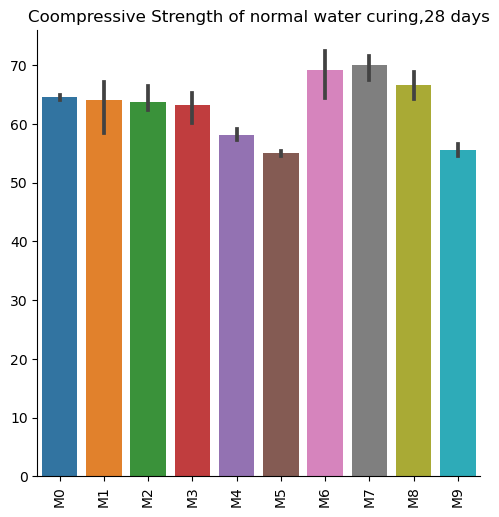

<Figure size 1800x600 with 0 Axes>

In [604]:
sns.catplot(data=df_waterCurng,kind='bar')
plt.title('Coompressive Strength of normal water curing,28 days')
plt.xticks(rotation ='vertical');plt.figure(figsize=(18, 6))

###### inferance
As we can see that during normal water curing period of 28 days, the best mix is M7(PPFiber,vf=0.2) as compared with the normal concrete mix, and the second best was M6(PalmDataFiber,vf=1)

Checking the best concrete density mix, based on normal water curing of 28 days

The moist sand curing method produced concrete specimen with the highest mean density of 2502.72 Kg/m3, followed by the polythene and water submerged methods with mean values of 2484.94 Kg/m3 and 2461.23 Kg/m3 respectively. The polythene curing method produced the highest range of density and standard deviation indicating that the method is highly unreliable. The specimens cured by burlap method produced the lowest range of density and standard deviation indicating that the method is reliable.

In [545]:
#as we already have the sd data so  we can sort the lsit to find the lowes value.
SD.sort()

In [558]:
labels1=['M0 control','M5 PalmDataFiber,vf=0.6','M4 PalmDataFiber,vf=0.2',
         'M9 PPFiber,vf=1','M7 PPFiber,vf=0.2','M2 steel_fiber,vf=0.6','M3 steel_fiber,vf=1',
         'M8 PPFiber,vf=0.6','M6 PalmDataFiber,vf=1','M1 steel_fiber,vf=0.2',]
SD
for l,t in zip(labels1,SD):
    print(l,' =           ',t)

M0 control  =            0.4368
M5 PalmDataFiber,vf=0.6  =            0.4582
M4 PalmDataFiber,vf=0.2  =            0.9504
M9 PPFiber,vf=1  =            1.4142
M7 PPFiber,vf=0.2  =            2.2029
M2 steel_fiber,vf=0.6  =            2.2911
M3 steel_fiber,vf=1  =            2.7592
M8 PPFiber,vf=0.6  =            3.2456
M6 PalmDataFiber,vf=1  =            4.2219
M1 steel_fiber,vf=0.2  =            4.98


# 28 Days Water curing Conclusion.

From the above data we can conclude tha the mixture M0(normal concrete mix) and M5(PalmDataFiber,vf=0.6) and thus having the lowest SD, and are having the good compressive strenght on a 28 days period, with normal water curing

COMPARING THE compressive strenght of around 6 MONTH HEAT-COOL WITH 28 DAYS WATER CURING.

# Conclusion " Comparing of all the mixture regarding its period "

### Comparing 6 month Heat-Cool period with 6 month Wet-Dry

Text(0.5, 1.0, 'Compressive Strenght of 6 month Wet-Dry')

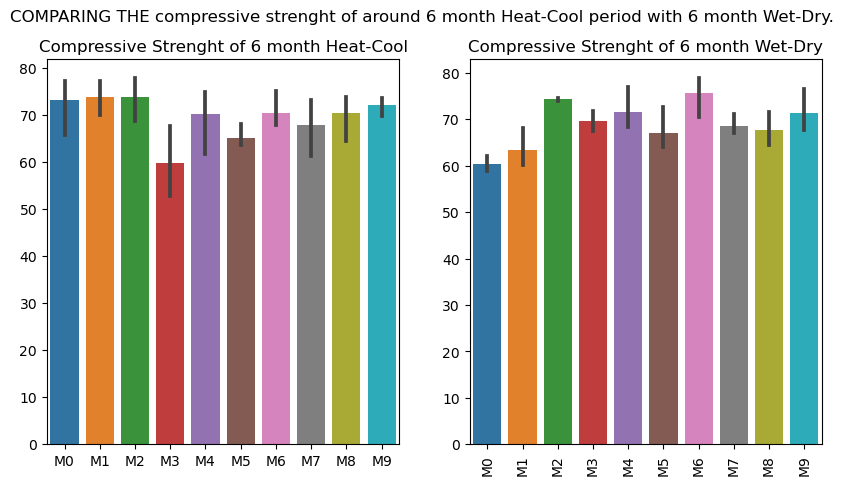

In [625]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))
fig.suptitle('COMPARING THE compressive strenght of around 6 month Heat-Cool period with 6 month Wet-Dry.')

sns.barplot(ax=axes[0],data=df_heat_cool)
plt.xticks(rotation='vertical')
axes[0].set_title('Compressive Strenght of 6 month Heat-Cool')

sns.barplot(ax=axes[1],data=df_wetdry)
plt.xticks(rotation='vertical')
axes[1].set_title('Compressive Strenght of 6 month Wet-Dry')

Text(0.5, 1.0, 'Compressive Strenght at 6 month Heat-Cool')

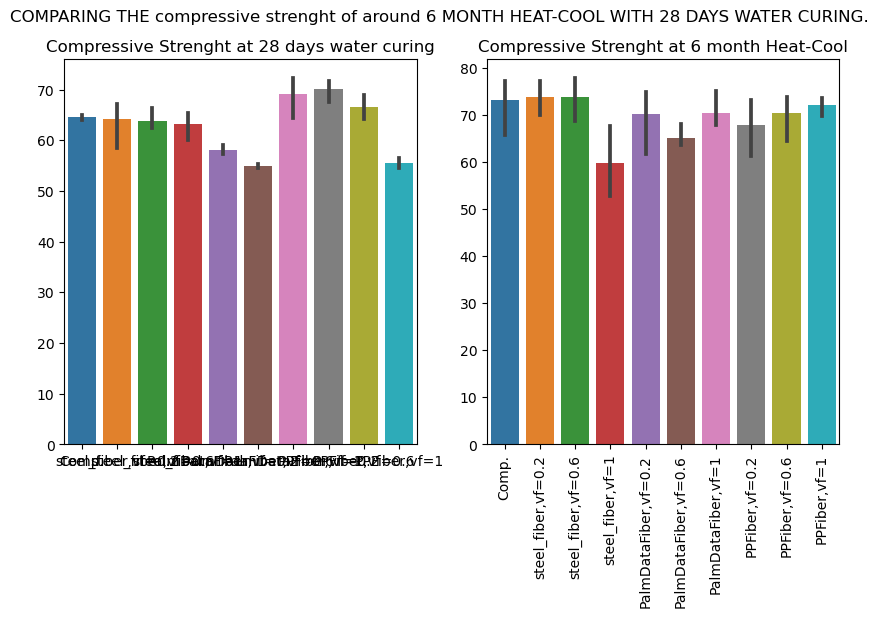

In [621]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))
fig.suptitle('COMPARING THE compressive strenght of around 6 MONTH HEAT-COOL WITH 28 DAYS WATER CURING.')

sns.barplot(ax=axes[0],data=df_waterCurng)
plt.xticks(rotation='vertical')
axes[0].set_title('Compressive Strenght at 28 days water curing')

sns.barplot(ax=axes[1],data=df_heat_cool)
plt.xticks(rotation='vertical')
axes[1].set_title('Compressive Strenght at 6 month Heat-Cool')

Text(0.5, 1.0, 'Compressive Strenght at 6 month Wet-Dry')

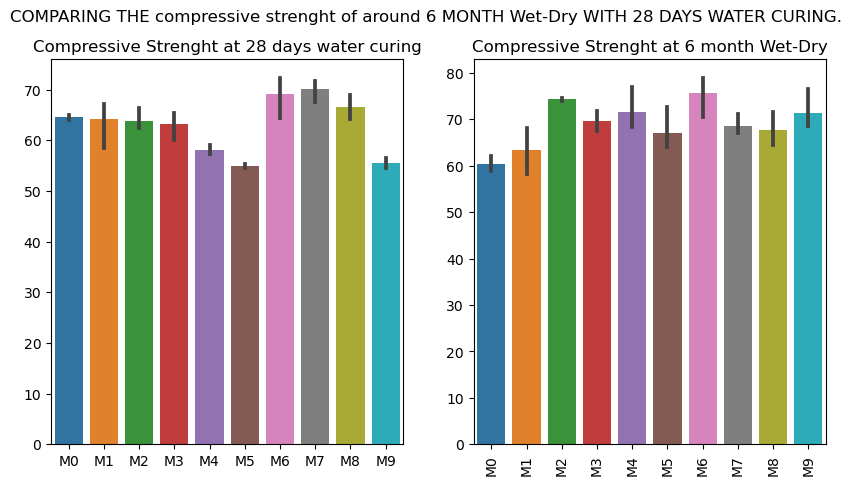

In [623]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))
fig.suptitle('COMPARING THE compressive strenght of around 6 MONTH Wet-Dry WITH 28 DAYS WATER CURING.')

sns.barplot(ax=axes[0],data=df_waterCurng)
plt.xticks(rotation='vertical')
axes[0].set_title('Compressive Strenght at 28 days water curing')

sns.barplot(ax=axes[1],data=df_wetdry)
plt.xticks(rotation='vertical')
axes[1].set_title('Compressive Strenght at 6 month Wet-Dry')